# **Medical Insurance Price Prediction using Machine Learning in Python :**
###In this project, we will try to extract some insights from a dataset that contains details about the background of a person who is purchasing medical insurance along with the what amount of premium is charged to those individuals.

# Feature Information

###**age :** different ages of a people.
###**sex :** gender of a people female or male.
###**bmi :** weight of people divided by square of height.
###**children :** number of children.
###**smoker :** people is smoker or not.
###**region :** in which region people belong.
###**charges :** insurance cost.

##Import Liabraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##Data Collection

In [25]:
df = pd.read_csv('/content/insurance.csv')

##Understanding the data

###Find shape of our dataset (Number of rows and number of columns)

In [26]:
df.shape

(1338, 7)

**Observation :**
###This dataset contains 1338 rows and 7 columns.

In [27]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

###Get information about our dataset like total number of rows, total number of columns, datatypes of each column

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Observation :**
###From the above, we can see that the dataset contains 2 columns with float values 3 with categorical values and the rest contains integer values.

###Display top 5 rows of dataset

In [29]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


###Check last 5 rows of the dataset

In [30]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


###Get overall Statistics about the dataset

In [31]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


##Data Preprocessing
###Handling missing values
### Data transformation

In [32]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [33]:
df.duplicated().sum()

1

In [34]:
df.drop_duplicates(inplace=True)

In [35]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Observation :**
###So, here we can conclude that there are no null values in the dataset given.

##Exploratory Data Analysis

In [36]:
numerical_cols = df.select_dtypes(exclude="object").columns.to_list()
print(f'Numerical columns in the data : {numerical_cols}')

Numerical columns in the data : ['age', 'bmi', 'children', 'charges']


In [37]:
categorical_cols = df.select_dtypes(exclude=['number']).columns.to_list()
print(f'Categorical columns in the data :{categorical_cols}')

Categorical columns in the data :['sex', 'smoker', 'region']


##Data Visualization

##Univariate Analysis

#**Histogram**

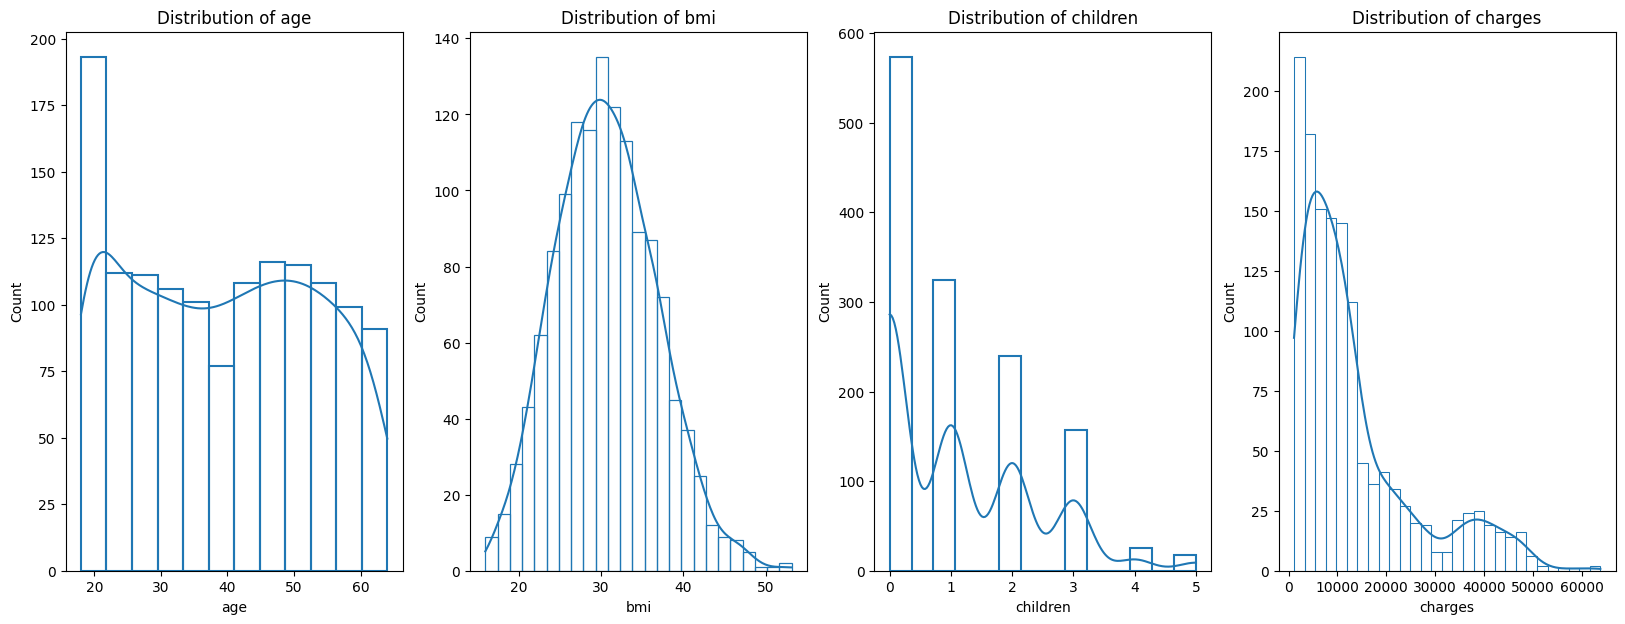

In [38]:
fig, axes = plt.subplots(ncols=4, figsize=(20,7))
for index, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, kde=True, fill=False, ax=axes[index]).set(title='Distribution of ' + col)

plt.show()

**Observation :**
###We can see that bmi column follows **Normal distribution**

#**Bar Plot**

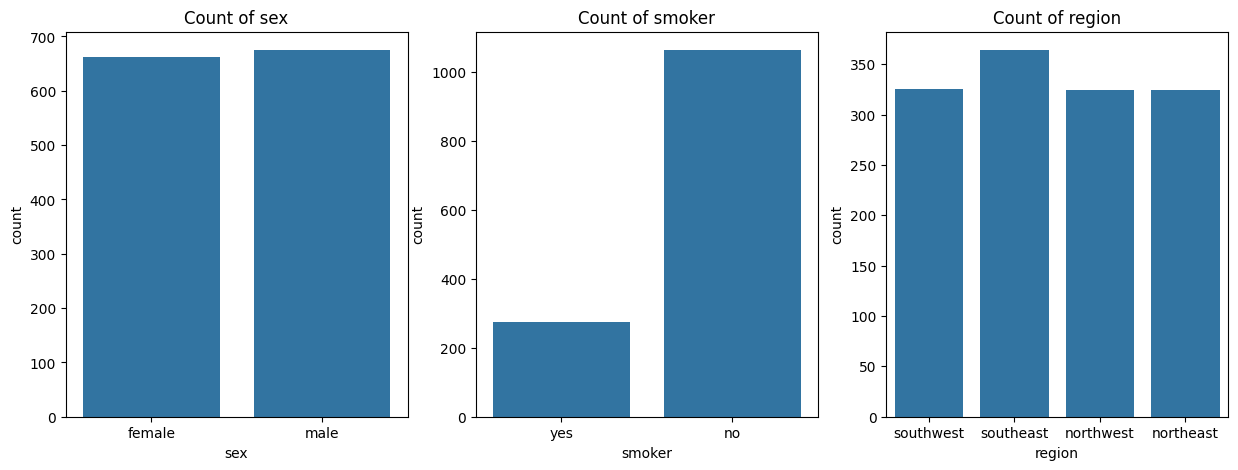

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
for col, subplot in zip(categorical_cols, axes.flatten()):
    sns.countplot(x=df[col], ax= subplot).set(title='Count of ' + col)
plt.show()

###**Observations :**
###In the 1st plot we can see that female and male are approximately equal in number.
###In the 2nd plot we can see that count of no smoker is more.
###in the 3rd plot we can see that more number of people belongs to southeast region.

##Bivariate Analysis

#**Pie Plot**

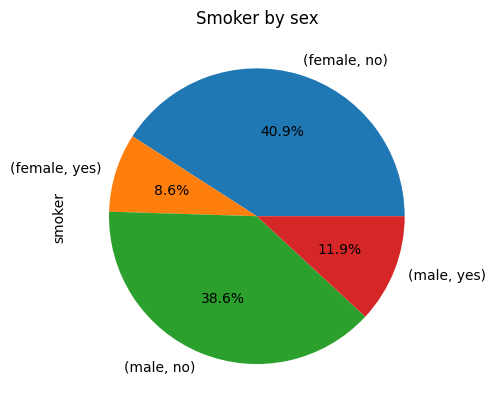

<Figure size 2000x1000 with 0 Axes>

In [40]:
df.groupby('sex').smoker.value_counts().plot.pie(autopct='%.1f%%')
plt.title('Smoker by sex')
plt.figure(figsize=(20,10))
plt.show()

**Observation :**
### As we can see that percentage of female with no smoking is more.

#**Bar Plot**

<function matplotlib.pyplot.show(close=None, block=None)>

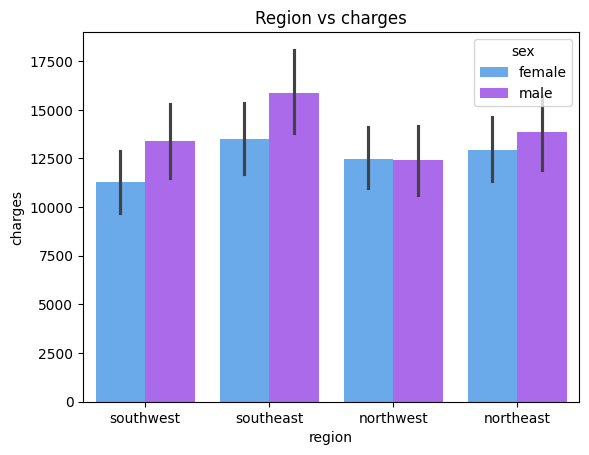

In [41]:
plt.title('Region vs charges')
sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')
plt.show

**Observations :**
###So overall the highest medical charges are in the Southeast for both male and female.
###Charges are on the higher side for males as compared to females but the difference is not that much.
###Charges are approximately the same in the given 4 regions.

#**Scatter Plot**

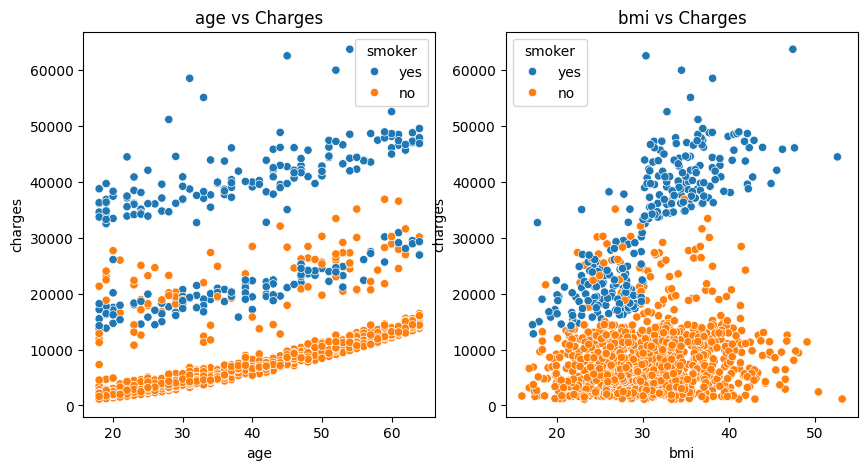

In [42]:
features =['age','bmi']

plt.subplots(figsize=(10,5))
for i, col in enumerate(features):
    plt.subplot(1, 2, i+1)
    sns.scatterplot(data=df, x=col, y='charges', hue='smoker').set(title=col + ' vs Charges')
plt.show()

**Observations :**
###A clear distinction can be observed here between the charges that smokers have to pay. Also here as well we can observe that as the age of a person increases premium prices goes up as well.

## Multivariate analysis

#**Heatmap**

<Axes: >

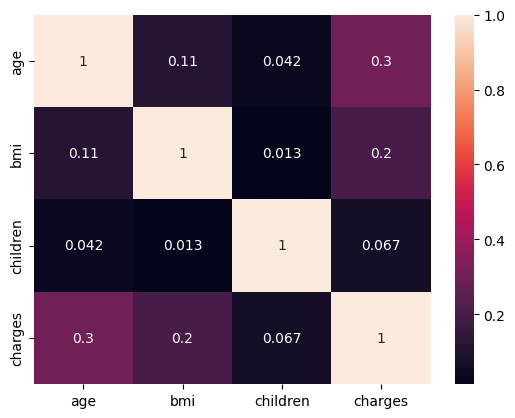

In [43]:
sns.heatmap(df[numerical_cols].corr(), annot=True)

**Observation :**
###There is no strong relationship between charges, children, bmi and age columns.

# Data Preprocessing

###Check outliers using **Boxplot**

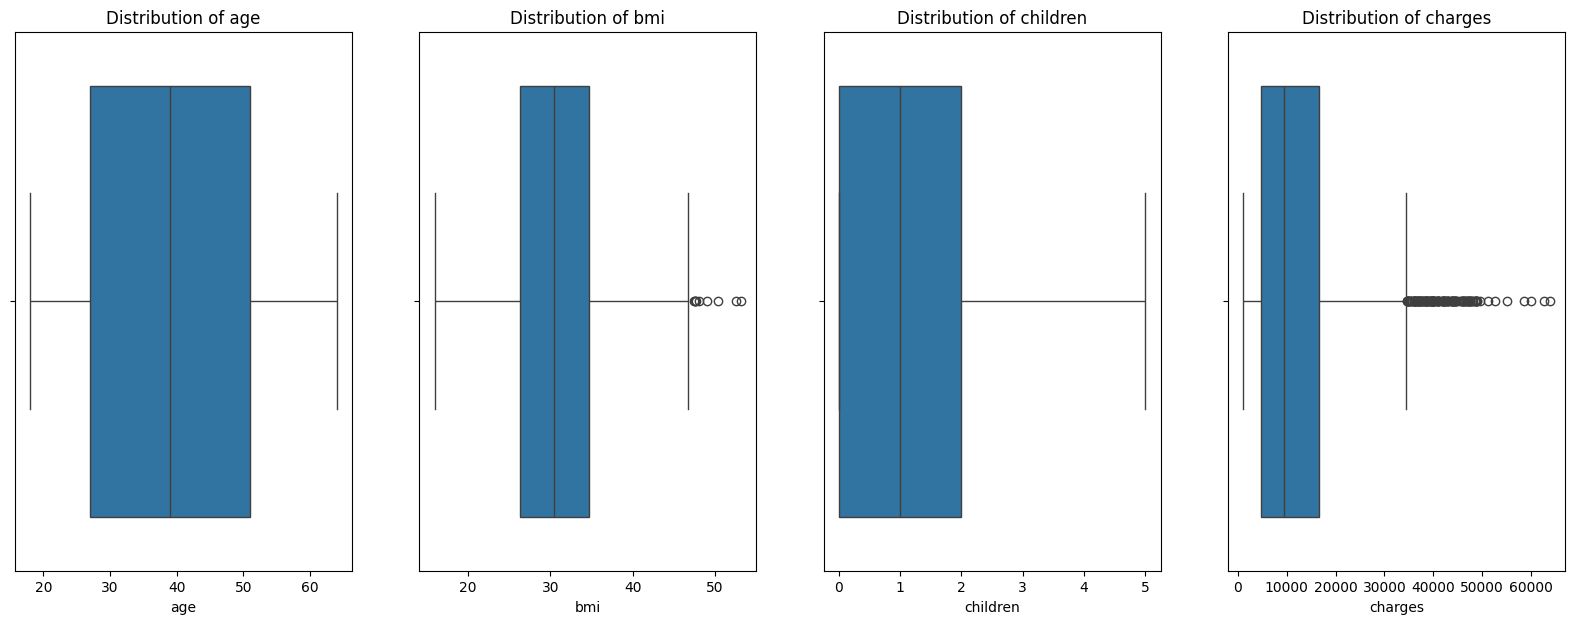

In [44]:
fig, axes = plt.subplots(ncols=4, figsize=(20,7))
for index, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x=col, ax=axes[index]).set(title='Distribution of ' + col)

plt.show()

**Observation :**
###We can see that due to presence of outliers present in charges column we need  to treat the outliers by replacing the values with mean as the  column consists of continuous data and in bmi column least outliers are present so we trear the outliers by removing values.

###Replacing Outliers

In [45]:
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)

IQR = Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

print(f"Q1 = {Q1}")
print(f"Q3 = {Q3}")
print(f"IQR = {IQR}")
print(f"Lower Whisker = {lower_bound}")
print(f"Upper Whisker = {upper_bound}")

Q1 = 4746.344
Q3 = 16657.71745
IQR = 11911.37345
Lower Whisker = -13120.716174999998
Upper Whisker = 34524.777625


In [46]:
df['charges'] = df['charges'].clip(lower =lower_bound, upper =upper_bound)

**Observation :**
###Here I used clip function to fit outliers in lower and upper bound.

<Axes: xlabel='charges'>

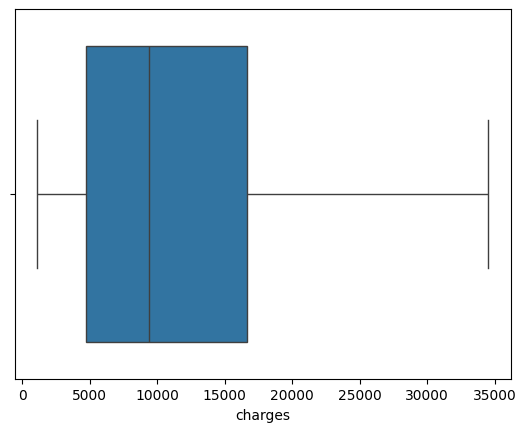

In [47]:
sns.boxplot(x=df['charges'])

###Remove Outliers

In [48]:
max_bmi=df['bmi'].quantile(0.99)
max_bmi

46.411200000000036

In [49]:
# Now removing outliers by filtering bmi values less than max_bmi

df = df[ df['bmi']<max_bmi]

<Axes: xlabel='bmi'>

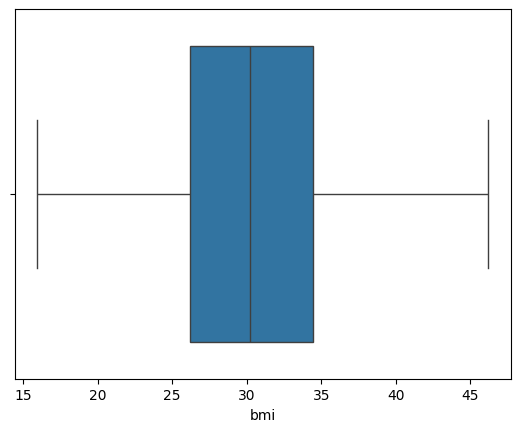

In [50]:
sns.boxplot(x=df['bmi'])

###Now we successfully treated the outliers.

##Model Development

##Label Encoding

In [51]:
from sklearn.preprocessing import LabelEncoder

label =  LabelEncoder()

df['sex'] = label.fit_transform(df['sex'])
df['smoker'] = label.fit_transform(df['smoker'])
df['region'] = label.fit_transform(df['region'])

##Feature Selection

In [52]:
X = df.drop(['charges'], axis = 1)
y = df['charges']

##Splitting the dataset into the training and test set

In [53]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=3)

In [54]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


##Feature Scaling

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X['age'] = scaler.fit_transform(np.array(X['age']).reshape(-1,1))
X['bmi'] = scaler.fit_transform(np.array(X['bmi']).reshape(-1,1))
X['children'] = scaler.fit_transform(np.array(X['children']).reshape(-1,1))

**Observation :**
###Here in StandardScaler expecting 2D array but got 1D array thats why I used reshape function so that the array will get reshaped in such a way that the resulting array has only 1 column.

In [56]:
X

,age,sex,bmi,children,smoker,region
0,-1.439139,0,-0.440595,-0.906979,1,3
1,-1.510329,1,0.563177,-0.076000,0,2
2,-0.798428,1,0.431507,1.585956,0,2
3,-0.442477,1,-1.328941,-0.906979,0,1
4,-0.513667,1,-0.273014,-0.906979,0,1
...,...,...,...,...,...,...
1333,0.767756,1,0.084376,1.585956,0,1
1334,-1.510329,0,0.246827,-0.906979,0,0
1335,-1.510329,0,1.089858,-0.906979,0,2
1336,-1.296759,0,-0.799695,-0.906979,0,3


##Build the ML model

In [57]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def regression_metrics(model, y_test, y_pred):
    print("\t\t", model)
    print("R2 score :", r2_score(y_test,y_pred))
    print("Mean absolute error :", mean_absolute_error(y_test,y_pred))
    print("Mean squared error :", mean_squared_error(y_test,y_pred))
    print("Root Mean squared error :", mean_squared_error(y_test,y_pred, squared=False))

In [58]:
from sklearn.linear_model import LinearRegression

reg1 = LinearRegression()
reg1.fit(x_train, y_train)
y_pred1 = reg1.predict(x_test)
regression_metrics("Linear Regression", y_test, y_pred1)

		 Linear Regression
R2 score : 0.7432917228065702
Mean absolute error : 3508.8827373275103
Mean squared error : 26863257.56364818
Root Mean squared error : 5182.977673466111


In [59]:
from sklearn.tree import DecisionTreeRegressor

reg2 = DecisionTreeRegressor()
reg2.fit(x_train, y_train)
y_pred2 = reg2.predict(x_test)
regression_metrics("Decision Tree Regressor", y_test, y_pred2)

		 Decision Tree Regressor
R2 score : 0.5636099943224429
Mean absolute error : 3207.4743598679283
Mean squared error : 45666065.967498705
Root Mean squared error : 6757.667198634356


In [60]:
from sklearn.ensemble import RandomForestRegressor

reg3 = RandomForestRegressor(n_estimators=120)
reg3.fit(x_train,y_train)
y_pred3 = reg3.predict(x_test)
regression_metrics("Random Forest Regressor", y_test, y_pred3)

		 Random Forest Regressor
R2 score : 0.7704061579977504
Mean absolute error : 2655.378410738809
Mean squared error : 24025865.39150297
Root Mean squared error : 4901.618650150475


##K-Nearest Neighbors

In [61]:
# Find optimal values of 'k' neighbors for KNN

from sklearn.neighbors import KNeighborsRegressor

error = []
# Calculating MAE error for K values between 1 and 20
k_neighbors = range(1,21)
for i in k_neighbors:
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    mae = mean_absolute_error(y_test, pred_i)
    error.append(mae)

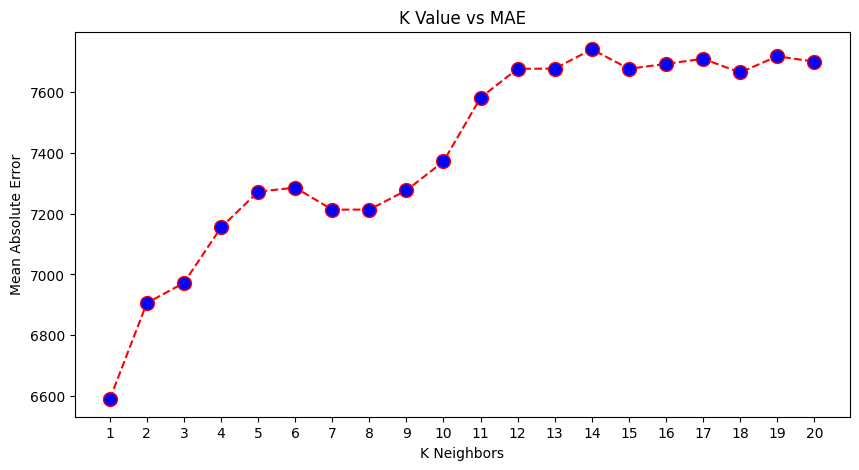

In [62]:
plt.figure(figsize=(10,5))
plt.plot(k_neighbors, error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.xticks(k_neighbors)
plt.title('K Value vs MAE')
plt.xlabel('K Neighbors')
plt.ylabel('Mean Absolute Error')
plt.show()

###k=3 is the optimal value as MAE is lowest when k=3.

In [63]:
reg4 = KNeighborsRegressor(n_neighbors=3)
reg4.fit(x_train,y_train)
y_pred4 = reg4.predict(x_test)
regression_metrics("K Nearest Neighbors Regressor", y_test, y_pred4)

		 K Nearest Neighbors Regressor
R2 score : 0.04503246155802143
Mean absolute error : 6972.159981061635
Mean squared error : 99932652.07712805
Root Mean squared error : 9996.632036697561


**The best model is RandomForestRegressor.**


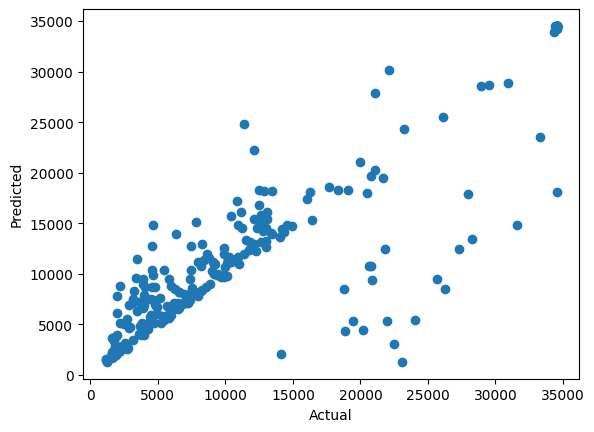

In [64]:
plt.scatter(y_test,y_pred3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

<Axes: xlabel='charges'>

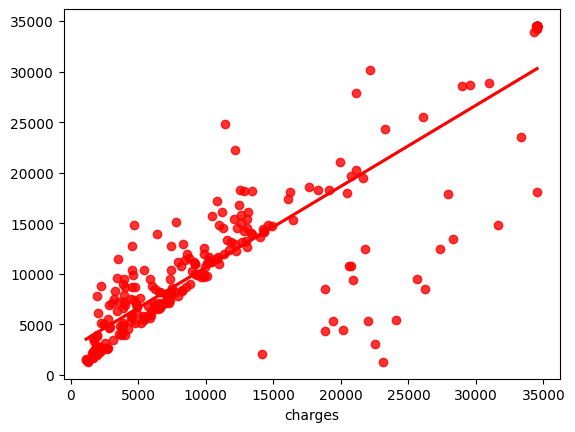

In [65]:
sns.regplot(x=y_test, y=y_pred3 ,ci=None, color ='red')

In [66]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred3,'Difference':y_test-y_pred3})
pred_df

,Actual Value,Predicted Value,Difference
559,1646.429700,1717.192343,-7.076264e+01
665,34524.777625,34524.777625,-8.003553e-11
822,1621.882700,3628.188936,-2.006306e+03
625,3736.464700,3927.325603,-1.908609e+02
684,4766.022000,8653.060998,-3.887039e+03
...,...,...,...
45,20630.283510,10735.279591,9.895004e+03
1255,6474.013000,6625.982222,-1.519692e+02
932,10096.970000,11028.212981,-9.312430e+02
718,10848.134300,17189.914181,-6.341780e+03


###Model Prediction on new data

In [67]:
charges = pd.DataFrame([[19,	0,	27.900,	0,	1,	0]],columns=X.columns)
charges

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,0


In [68]:
charges_pred= reg3.predict(charges)
charges_pred

array([17219.71761042])